## Linear Regression
Here, we used a sample data that we generated to create a linear regression and train the model with. We evaluated the model with the RMSE and R_squared and used the residuals to analyse our model

In [3]:
# import the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df2 = pd.read_csv('data.csv')
df2.head()

,id,name,weather,ramen,drinks,day
0,87,Natalie Kim,1,1,1,0
1,75,Stacey Nguyen,5,6,6,6
2,55,Phillip Martinez,4,4,4,1
3,45,Adam Morton,5,6,6,1
4,8,Brian Patel,2,3,3,3


In [5]:
X = df2[['day' , 'weather']]
y = df2["ramen"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24)

lm = LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

y_actual = y_test.to_numpy()

In [6]:
### RMSE and R Squared ###
# Import libraries to use RMSE and r-squared metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Calculate RMSE (a measure of how spread out the errors are)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

# Show average y-value in the actual data
y_test.mean()

# Show R-squared (a measure of how the linear regression model estimates the actual points in the dataset)
r_squared = r2_score(y_test, y_pred)
r_squared

0.7813661772461882

Text(0, 0.5, 'residuals')

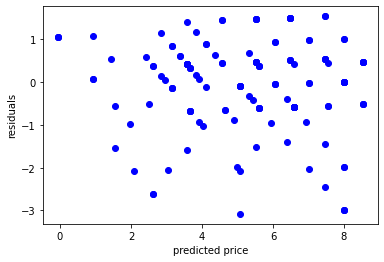

In [7]:
# Use the linear regression to predict the y-values for the x-values in the test set
y_pred = lm.predict(X_test)

# Create a DataFrame of the points on the linear regression line
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the residuals,
# i.e. the differences in y-values between the actual points in the dataset, and the points on linear regression line
results['residuals'] = results['Actual'] - results['Predicted']

# Create a scatter plot of predicted price (x-axis) vs residuals (y-axis)
plt.scatter(results['Predicted'], results['residuals'],  color='blue')
plt.xlabel("predicted price")
plt.ylabel("residuals")

### Understanding the data
From the residual plot and the r_squared value, the relationship lies with the weather and day. The r_squared is a respectable 0.78 and the residuals scatter plot is randomised.

Weekends warrant more customers to patronise as they are free to travel there. The weather plays an effect as customers would think about eating a soup based dish for their meals. 

The time is ommited as it does not have much relationship for this scenario. We are capturing the orders one by one and time is better captured when group with day or date. We can generalise the timing with the popular times API to get the popular timing. 

(array([ 4.,  3.,  7.,  5.,  6., 28., 25., 40., 15., 17.]),
 array([-3.08147077, -2.61895876, -2.15644674, -1.69393472, -1.23142271,
        -0.76891069, -0.30639867,  0.15611334,  0.61862536,  1.08113738,
         1.54364939]),
 <BarContainer object of 10 artists>)

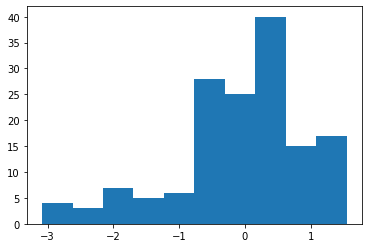

In [8]:
# Show histogram of residuals
plt.hist(results['residuals'])

The data right now is left skewed indicating that either the model may not be appropriate or the data has some bias. We believe with more accurate data, we would get less skew in the residual plot.

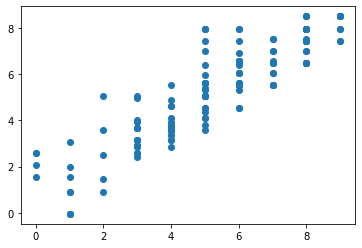

In [9]:
# Use the linear regression model to predict y-values by giving the x-values in the test set
y_pred = lm.predict(X_test)

# Convert y_test (which is a Series) into an n-dimensional array (ndarray)
y_actual = y_test.to_numpy()
    
# Show scatterplot of actual values (x-axis) vs predicted values (y-axis)
plt.scatter(y_test,y_pred)

### Conclusion
There is a relationship seen on the scatter plot but it is somewhat far from y=x, ultimate, better data and more parameters would be needed to try for a more accurate model

## Synthetic Data Generation
This is a demonstration of using Faker to generate the synthetic data. The data.csv is generated with something similar to the codes below. The data was fixed more after this iteration but I lost that faker code. So here is a demonstration. 

To explain the code, I was trying to create a data set with multiple independent variables. I initially settled on day, time, weather and gender. Due to the randomness, gender is difficult to fit for an FnB situation and I was not able to fit it in, thus it was omitted. Time was useful, but I did not have the capacity to create an elaborate sequence to make good time data. I therefore settled on day and weather. Giving more records to Weekends and making sales go up during colder weather, since it was a soup base dish.

This created a relationship but the data that was slightly biased. Given more time, I would be able make a better set of fake data that has more independent variables and less skew.

In [ ]:
from faker import Faker
from random import randint
import os
import pandas as pd
import datetime
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

fake = Faker()

df = pd.DataFrame()

for i in range(150):
    df.loc[i,'id']= randint(1, 100)
    df.loc[i,'name']= fake.name()
    #0 is very hot, 5 is very cold
    weather = randint(0, 5)
    df.loc[i,'weather']= weather
    # biasing food sales by the weather
    food = randint(weather, weather+1)
    df.loc[i,'ramen']= food
    df.loc[i,'drinks']= food
    df.loc[i,'day']=randint(0, 6)
    
for i in range(150,500):
    df.loc[i,'id']= randint(1, 100)
    df.loc[i,'name']= fake.name()
    #0 is very hot, 5 is very cold
    weather = randint(0, 5)
    df.loc[i,'weather']= weather
    # biasing food sales by the weather
    food = randint(weather+3, weather+4)
    df.loc[i,'ramen']= food
    df.loc[i,'drinks']= food
    df.loc[i,'day']= randint(5, 7)
